[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mjwen/chee6397/blob/main/lab/lab3-linear_models.ipynb)

# Lab 3: Data Processing & Linear Models

This notebook is intended to get you familiar with the below topics:

- Load, explore and split data
- Using the scikit-learn library to train models (linear regression for example)


## Load the real estate valuation dataset

This data set consists of the market historical data set of real estate valuation collected from Sindian Dist., Taipei City.

More on the dataset: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set


### Load the dataset


In [1]:
import pandas as pd

df = pd.read_csv("./data/real_estate_valuation_dataset.csv")

### Explore the data


In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
len(df)

414

In [4]:
df["Y house price of unit area"]

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
import matplotlib.pyplot as plt


def plot_histogram(data):
    fig, ax = plt.subplots()
    ax.hist(data, bins=20)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

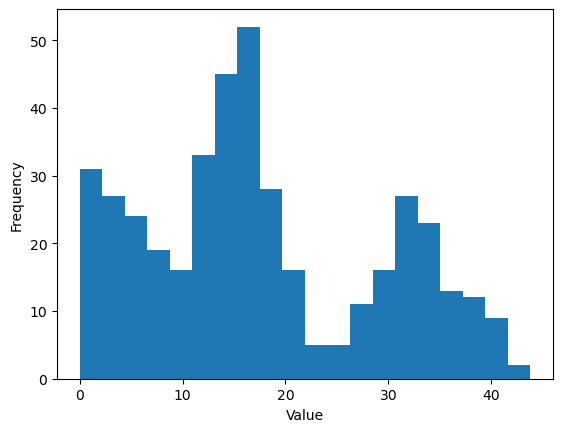

In [7]:
plot_histogram(df["X2 house age"])

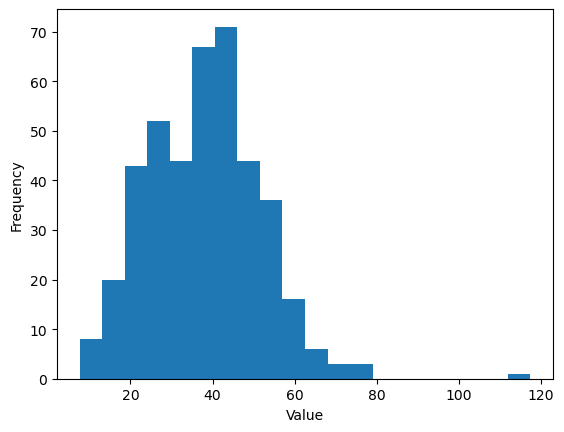

In [8]:
plot_histogram(df["Y house price of unit area"])

In [9]:
def plot_scatter(X, Y):
    fig, ax = plt.subplots()
    ax.scatter(X, Y)
    ax.set_xlabel("Horizonal")
    ax.set_ylabel("Vertical")

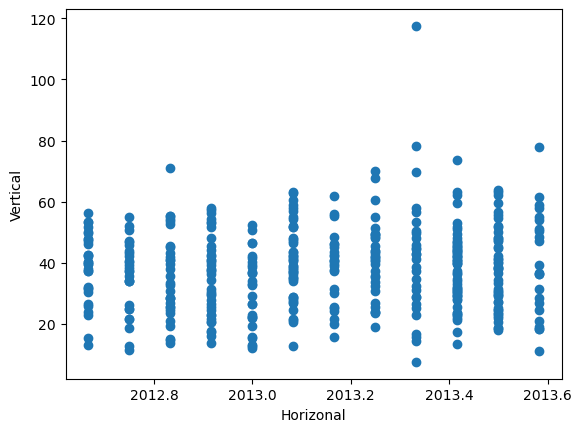

In [10]:
plot_scatter(df["X1 transaction date"], df["Y house price of unit area"])

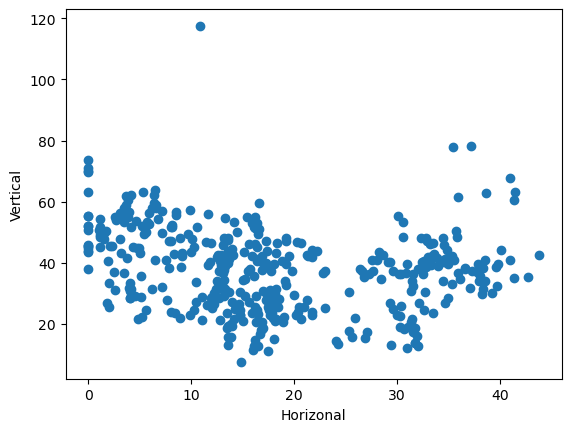

In [11]:
plot_scatter(df["X2 house age"], df["Y house price of unit area"])

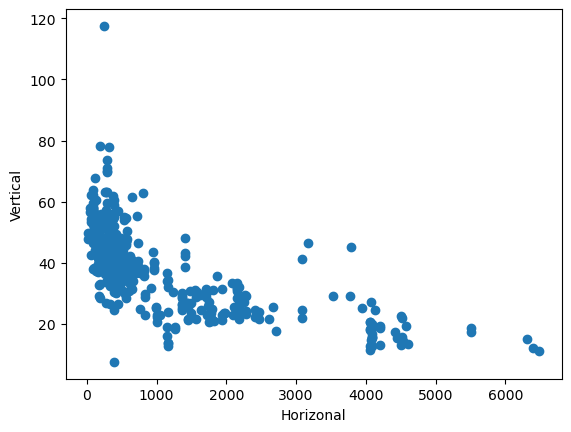

In [12]:
plot_scatter(
    df["X3 distance to the nearest MRT station"], df["Y house price of unit area"]
)

#### Convert to other formats


In [13]:
Y = df["Y house price of unit area"]
type(Y)

pandas.core.series.Series

In [14]:
Y1 = Y.to_list()
type(Y1)

list

In [15]:
Y2 = Y.to_numpy()
type(Y2)

numpy.ndarray

In [16]:
# save as an excel xlsx file

df.to_excel("./data/real_estate_valuation_dataset.xlsx", index=False)

## Split dataset


#### Convert to numpy arrays


In [17]:
features = [
    "X1 transaction date",
    "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores",
    "X5 latitude",
    "X6 longitude",
]
X = df[features].to_numpy()

X.shape

(414, 6)

In [18]:
type(X)

numpy.ndarray

In [19]:
y = df["Y house price of unit area"].to_numpy()

y.shape

(414,)

In [20]:
type(y)

numpy.ndarray

In [21]:
from sklearn.model_selection import train_test_split

#### Split by ratio


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train.shape =", X_train.shape)
print("X_test.shape =", X_test.shape)

X_train.shape = (331, 6)
X_test.shape = (83, 6)


#### Split by number


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=0)

print("X_train.shape =", X_train.shape)
print("X_test.shape =", X_test.shape)

X_train.shape = (314, 6)
X_test.shape = (100, 6)


#### Use random seed to make it reproducible


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100)

X_train[0]

array([2013.5833333,   35.4      ,  318.5292   ,    9.       ,
         24.97071  ,  121.54069  ])

### Train, validation, test split


In [25]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(
    X_dev, y_dev, test_size=0.1, random_state=1
)

print("X_train.shape =", X_train.shape)
print("X_val.shape =", X_val.shape)
print("X_test.shape =", X_test.shape)

X_train.shape = (334, 6)
X_val.shape = (38, 6)
X_test.shape = (42, 6)


## Fit linear model


### Linear regression 

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_train)
mae = mean_squared_error(y_train, y_pred)

print("MSE on training set =", mae)

MSE on training set = 82.41466453682675


In [29]:
y_pred = model.predict(X_test)
mae = mean_squared_error(y_test, y_pred)

print("MSE on test set =", mae)

MSE on test set = 51.83750374286805


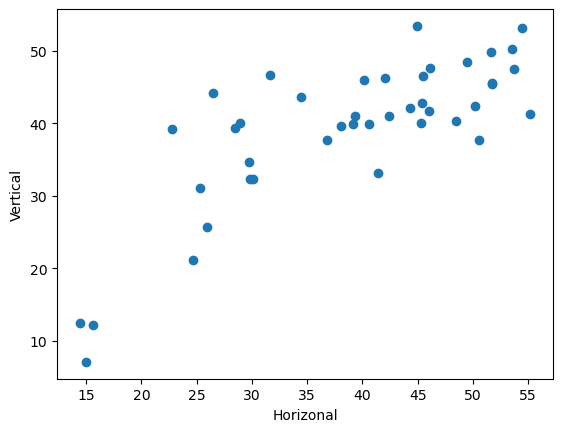

In [30]:
plot_scatter(y_test, y_pred)

### Cross validation

Q: What is the effect of data splitting on the model performance?


In [31]:
from sklearn.model_selection import cross_validate

model = LinearRegression()
cv_results = cross_validate(
    model, X, y, cv=5, scoring="neg_mean_squared_error", return_train_score=True
)

cv_results["test_score"]

array([ -49.89284058,  -89.03269132,  -57.8698601 , -134.81795278,
        -60.0483656 ])

### Ridge regression

Q: What is the effect of regularization on the model performance?


In [32]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
mean_squared_error(y_test, y_pred)

55.2204325346289

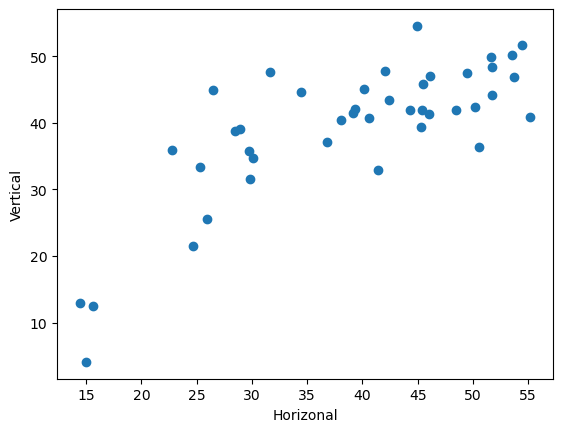

In [34]:
plot_scatter(y_test, y_pred)